## 1. Download And Extract

In [3]:
import glob
import json
import os
import re
import zipfile
from urllib.request import urlretrieve

import pandas as pd
import requests

In [18]:
# Necessary metadata
article_id = 14096681  # this is the unique identifier of the article on figshare
url = f"https://api.figshare.com/v2/articles/{article_id}"
headers = {"Content-Type": "application/json"}
output_directory = "../data/"

In [19]:
# Get the files data
response = requests.request("GET", url, headers=headers)
data = json.loads(response.text)
files = data["files"]
files

[{'id': 26579150,
  'name': 'daily_rainfall_2014.png',
  'size': 58863,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26579150',
  'supplied_md5': 'fd32a2ffde300a31f8d63b1825d47e5e',
  'computed_md5': 'fd32a2ffde300a31f8d63b1825d47e5e'},
 {'id': 26579171,
  'name': 'environment.yml',
  'size': 192,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26579171',
  'supplied_md5': '060b2020017eed93a1ee7dd8c65b2f34',
  'computed_md5': '060b2020017eed93a1ee7dd8c65b2f34'},
 {'id': 26586554,
  'name': 'README.md',
  'size': 5422,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26586554',
  'supplied_md5': '61858c6cc0e6a6d6663a7e4c75bbd88c',
  'computed_md5': '61858c6cc0e6a6d6663a7e4c75bbd88c'},
 {'id': 26766812,
  'name': 'data.zip',
  'size': 814041183,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26766812',
  'supplied_md5': 'b517383f76e77bd03755a63a8f

In [ ]:
%%time
# Downlaod the file
files_to_dl = ["data.zip"]
for file in files:
    if file["name"] in files_to_dl:
        os.makedirs(output_directory, exist_ok=True)
        urlretrieve(file["download_url"], output_directory + file["name"])

| Team Member | Operating System | RAM | Processor | Is SSD | Time taken |
|:-----------:|:----------------:|:---:|:---------:|:------:|:----------:|
| Vanessa Yuen  | Windows 10 Pro | 16GB  | AMD Ryzen 7  |  Y      |  1min 13s |
| Zheren Xu   | macOS Big Sur Version 11.6  |   16GB |  Apple M1 |Y|57.2s|
| Mahmoodur Rahman    | macOS Montereey Version 12.3  |  32GB  | Intel Core i9 | Y| 8.08 s |
| Anupriya Srivastava    | Windows 10 Pro | 16GB | Intel i5-7200U | Y | 2min 16s           |

In [ ]:
%%time
# Extract the zip file
with zipfile.ZipFile(os.path.join(output_directory, "data.zip"), "r") as f:
    f.extractall(output_directory)

| Team Member | Operating System | RAM | Processor | Is SSD | Time taken |
|:-----------:|:----------------:|:---:|:---------:|:------:|:----------:|
| Vanessa Yuen  | Windows 10 Pro | 16GB  | AMD Ryzen 7  |  Y      | 23.5 s |
| Zheren Xu   | macOS Big Sur Version 11.6  |   16GB |  Apple M1 |Y|15.9 s|
| Mahmoodur Rahman    | macOS Montereey Version 12.3  |  32GB  | Intel Core i9 | Y| 16.5 s |
| Anupriya Srivastava    | Windows 10 Pro | 16GB | Intel i5-7200U | Y | 27.7 s           |

## 2. Combining data CSVs

In [4]:
%%time
# Combine the CSV
# Remember to remove 'observed_daily_rainfall_SYD.csv' before running this cell
use_cols = [
    "time",
    "lat_min",
    "lat_max",
    "lon_min",
    "lon_max",
    "rain (mm/day)",
]

files = glob.glob("../data/*.csv")


df = pd.concat(
    (
        pd.read_csv(file, index_col=0, usecols=use_cols).assign(
            model=re.findall(r"[^\\]+(?=\_daily_rainfall)", file)[0]
        )
        for file in files
    )
)
df.to_csv("../data/combined_data.csv")

CPU times: total: 6min 31s
Wall time: 6min 32s


#### Compare

| Team Member | Operating System | RAM | Processor | Is SSD | Time taken |
|:-----------:|:----------------:|:---:|:---------:|:------:|:----------:|
| Vanessa Yuen  | Windows 10 Pro | 16GB  | AMD Ryzen 7  |  Y      |   7min 17s |
| Zheren Xu   | macOS Big Sur  |   16GB |  Apple M1 |Y|6min 14s|
| Mahmoodur Rahman    | macOS Montereey Version 12.3  |  32GB  | Intel Core i9 | Y| 6min 9s |
| Anupriya Srivastava    | Windows 10 Pro | 16GB | Intel i5-7200U | Y |   10min 7s         |

On average, mac takes slightly shorter time for combining CSV than Windows.  Faster processors definitely run the task faster.  For RAM, it doesn't show any difference from our result, possibly because all the machines are equipped with at least 16GB which is sufficient for the task.

## 3. Simple EDA

### 3.1 Sanity Check

In [5]:
print(df.shape)
print(df.head())

(62467843, 6)
                     lat_min  lat_max  lon_min  lon_max  rain (mm/day)  \
time                                                                     
1889-01-01 12:00:00   -36.25    -35.0  140.625    142.5   3.293256e-13   
1889-01-02 12:00:00   -36.25    -35.0  140.625    142.5   0.000000e+00   
1889-01-03 12:00:00   -36.25    -35.0  140.625    142.5   0.000000e+00   
1889-01-04 12:00:00   -36.25    -35.0  140.625    142.5   0.000000e+00   
1889-01-05 12:00:00   -36.25    -35.0  140.625    142.5   1.047658e-02   

                          model  
time                             
1889-01-01 12:00:00  ACCESS-CM2  
1889-01-02 12:00:00  ACCESS-CM2  
1889-01-03 12:00:00  ACCESS-CM2  
1889-01-04 12:00:00  ACCESS-CM2  
1889-01-05 12:00:00  ACCESS-CM2  


In [ ]:
df.info()

### 3.2 Load just columns what we want

#### Load all columns

In [9]:
%%time
df_all_col = pd.read_csv("../data/combined_data.csv")
print(df_all_col["model"].value_counts())

MPI-ESM1-2-HR       5154240
TaiESM1             3541230
NorESM2-MM          3541230
CMCC-CM2-HR4        3541230
CMCC-CM2-SR5        3541230
CMCC-ESM2           3541230
SAM0-UNICON         3541153
FGOALS-f3-L         3219300
GFDL-CM4            3219300
GFDL-ESM4           3219300
EC-Earth3-Veg-LR    3037320
MRI-ESM2-0          3037320
BCC-CSM2-MR         3035340
MIROC6              2070900
ACCESS-CM2          1932840
ACCESS-ESM1-5       1610700
INM-CM5-0           1609650
INM-CM4-8           1609650
KIOST-ESM           1287720
FGOALS-g3           1287720
MPI-ESM1-2-LR        966420
NESM3                966420
AWI-ESM-1-1-LR       966420
MPI-ESM-1-2-HAM      966420
NorESM2-LM           919800
BCC-ESM1             551880
CanESM5              551880
Name: model, dtype: int64
CPU times: total: 1min 35s
Wall time: 1min 43s


#### Load just what is needed

In [10]:
%%time
use_cols = ["lat_min", "lon_min", "rain (mm/day)", "model"]
df_4_cols = pd.read_csv("../data/combined_data.csv", usecols=use_cols)
print(df_4_cols["model"].value_counts())

MPI-ESM1-2-HR       5154240
TaiESM1             3541230
NorESM2-MM          3541230
CMCC-CM2-HR4        3541230
CMCC-CM2-SR5        3541230
CMCC-ESM2           3541230
SAM0-UNICON         3541153
FGOALS-f3-L         3219300
GFDL-CM4            3219300
GFDL-ESM4           3219300
EC-Earth3-Veg-LR    3037320
MRI-ESM2-0          3037320
BCC-CSM2-MR         3035340
MIROC6              2070900
ACCESS-CM2          1932840
ACCESS-ESM1-5       1610700
INM-CM5-0           1609650
INM-CM4-8           1609650
KIOST-ESM           1287720
FGOALS-g3           1287720
MPI-ESM1-2-LR        966420
NESM3                966420
AWI-ESM-1-1-LR       966420
MPI-ESM-1-2-HAM      966420
NorESM2-LM           919800
BCC-ESM1             551880
CanESM5              551880
Name: model, dtype: int64
CPU times: total: 1min 7s
Wall time: 1min 12s


#### Change dtype

In [11]:
%%time
df_change_type = pd.read_csv(
    "../data/combined_data.csv",
    dtype={
        "lat_min": "float32",
        "lat_max": "float32",
        "lon_min": "float32",
        "lon_max": "float32",
        "rain (mm/day)": "float32",
    },
)
print(df_change_type["model"].value_counts())

MPI-ESM1-2-HR       5154240
TaiESM1             3541230
NorESM2-MM          3541230
CMCC-CM2-HR4        3541230
CMCC-CM2-SR5        3541230
CMCC-ESM2           3541230
SAM0-UNICON         3541153
FGOALS-f3-L         3219300
GFDL-CM4            3219300
GFDL-ESM4           3219300
EC-Earth3-Veg-LR    3037320
MRI-ESM2-0          3037320
BCC-CSM2-MR         3035340
MIROC6              2070900
ACCESS-CM2          1932840
ACCESS-ESM1-5       1610700
INM-CM5-0           1609650
INM-CM4-8           1609650
KIOST-ESM           1287720
FGOALS-g3           1287720
MPI-ESM1-2-LR        966420
NESM3                966420
AWI-ESM-1-1-LR       966420
MPI-ESM-1-2-HAM      966420
NorESM2-LM           919800
BCC-ESM1             551880
CanESM5              551880
Name: model, dtype: int64
CPU times: total: 1min 38s
Wall time: 1min 47s


#### Compare

| Team Member | Operating System | RAM | Processor | Is SSD | Load All Cols| Load what is needed | Change dtype|
|:-----------:|:----------------:|:---:|:---------:|:------:|:----------:|:----------:|:----------:|
| Vanessa Yuen  | Windows 10 Pro | 16GB  | AMD Ryzen 7  |  Y      |1min13s   |46.2s|1min11s |
| Zheren Xu   | macOS Big Sur |   16GB |  Apple M1 |Y|57.8s|41.2s|57.4s|
| Mahmoodur Rahman    | macOS Montereey Version 12.3  |  32GB  | Intel Core i9 | Y| 53.8 s |
| Anupriya Srivastava    | Windows 10 Pro | 16GB | Intel i5-7200U | Y |    1min 44s | 1min 16s  | 1min 42s      |

The dataset has 6 columns in total. If we only load the columns that we plan to work with, the time required will be reduced by about 30%-40% on different machines. From the experimental results, changing the data type (float64 -> float32) has little impact on the time, but this change reduces the memory usage by about half.

## 4. Simple EDA in R

### 4.1 Transfer dataframe from python to R using Parquet format

In [ ]:
%load_ext rpy2.ipython

In [12]:
df = pd.read_csv("../data/combined_data.csv")
df.to_parquet("../data/combined_data_partition")

Time difference of 6.700003 secs


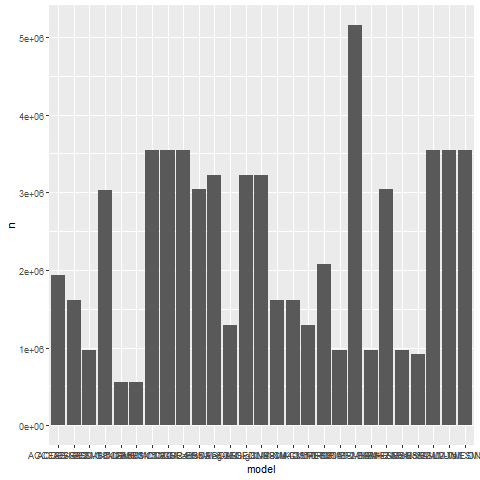

In [15]:
%%R
start_time <- Sys.time()
r_df <- read_parquet("../data/combined_data.parquet")
end_time <- Sys.time()
print(end_time - start_time)

result <- r_df %>% collect
result <- r_df %>% count(model)
hist <- result %>%
    ggplot(aes(x=model, y=n)) + 
    geom_col()
print(hist)

### 4.2 Transfer dataframe from python to R using Arrow Exchange

In [22]:
import pyarrow.dataset as ds
import rpy2.robjects.lib.ggplot2 as gp
import rpy2_arrow.pyarrow_rarrow as pyra
from rpy2.ipython.ggplot import image_png

In [21]:
%%time
dataset = ds.dataset("../data/combined_data.csv", format="csv")
table = dataset.to_table()
r_table = pyra.converter.py2rpy(table)

CPU times: total: 1min 20s
Wall time: 1min 16s


Time difference of 0.03129983 secs
# A tibble: 27 x 2
   model                  n
   <chr>              <int>
 1 ACCESS-CM2       1932840
 2 ACCESS-ESM1-5    1610700
 3 AWI-ESM-1-1-LR    966420
 4 BCC-CSM2-MR      3035340
 5 BCC-ESM1          551880
 6 CanESM5           551880
 7 CMCC-CM2-HR4     3541230
 8 CMCC-CM2-SR5     3541230
 9 CMCC-ESM2        3541230
10 EC-Earth3-Veg-LR 3037320
# ... with 17 more rows


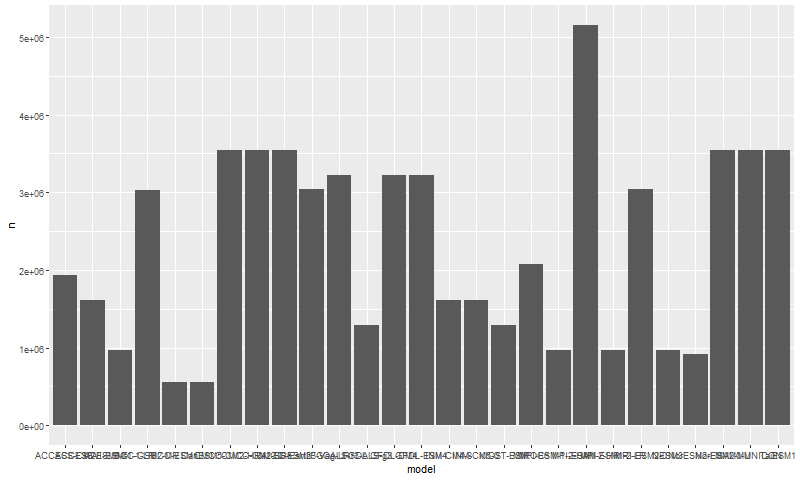

CPU times: total: 4.27 s
Wall time: 4.81 s


In [19]:
%%time
%%R -i r_table -w 800
suppressMessages(library(dplyr))
suppressMessages(library(tidyverse))
start_time <- Sys.time()
result <- r_table %>% count(model)
end_time <- Sys.time()
print(end_time - start_time)

## Simple EDA
df <- data.frame(result)
hist <- df %>%
    ggplot(aes(x=model, y=n)) + 
    geom_col()
print(hist)
print(result %>% collect())

### 4.3 Why we choose Arrow Exchange over others
1. Installation and usage is simple and easy
2. Access of `dplr` functions
3. Less time spent on serialization and deserialization than panda exchange (We have difficulties in loading the whole dataset with panda exchange)
4. It is a zero-copy read, there is no need to have additional file like parquet file

# Challenges and Difficulties

- The memory required for processing was very high (512 MB, 1 GB) and we were getting error messages while combining the files and converting file format. So, we had to close all the other applications, including Slack, to run the code.
- The notebook crashed multiple times and the system would hang after the crash. So, we restarted the machine every time we ran into error.
- Running the overall notebook took too long and we waited for it to complete before submission. Since, the resource requirement was high, we could not do anything else on the machine during that time.
- Merge conflicts were difficult to solve. So, we had to discuss on slack about the sequence of updates in the notebook.